In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("/media/barnobarno666/CODING/ALL CODES/ML NEW/TIMESERIESBOOK/Metro_Interstate_Traffic_Volume.csv")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [13]:
#x contains temp and date_time column
x=df[['temp','date_time']]
x.head()

,temp,date_time
0,288.28,2012-10-02 09:00:00
1,289.36,2012-10-02 10:00:00
2,289.58,2012-10-02 11:00:00
3,290.13,2012-10-02 12:00:00
4,291.14,2012-10-02 13:00:00


In [17]:
dates=pd.to_datetime(x['date_time'])
dates.head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [18]:
dates_in_seconds = (pd.to_datetime(x['date_time']).astype(int) / 10**9)
dates_in_seconds.head()

0    1.349168e+09
1    1.349172e+09
2    1.349176e+09
3    1.349179e+09
4    1.349183e+09
Name: date_time, dtype: float64

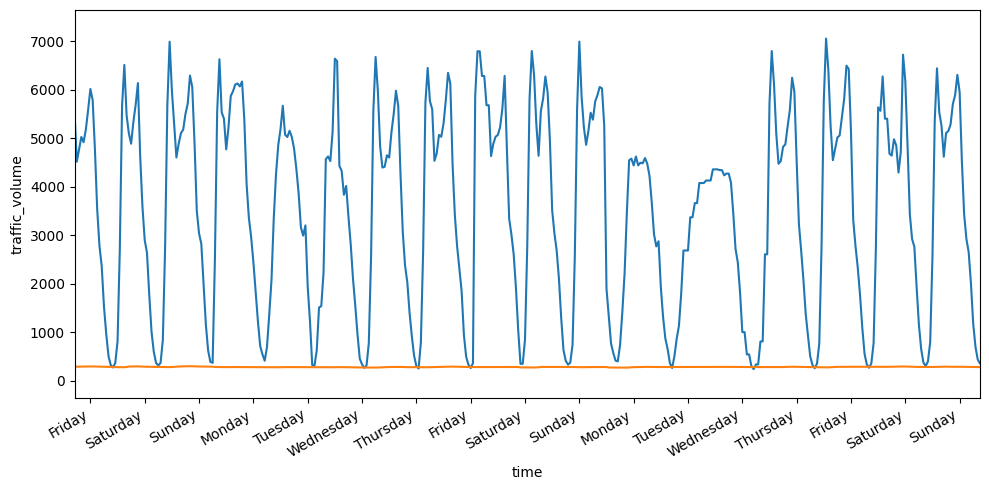

In [25]:
fig ,ax=plt.subplots(figsize=(10,5))
ax.plot(df['traffic_volume'])
ax.set_xlabel('time')
ax.set_ylabel('traffic_volume')
days = ['Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday']
resized_days = np.resize(days, 17)

plt.xticks(np.arange(7,400,24),resized_days)

plt.xlim(0,400)
fig.autofmt_xdate()
plt.tight_layout()

In [39]:
for i in range(len(df['temp'])):
    if df['temp'][i]<200:
        df['temp'][i]=df['temp'][i-1]

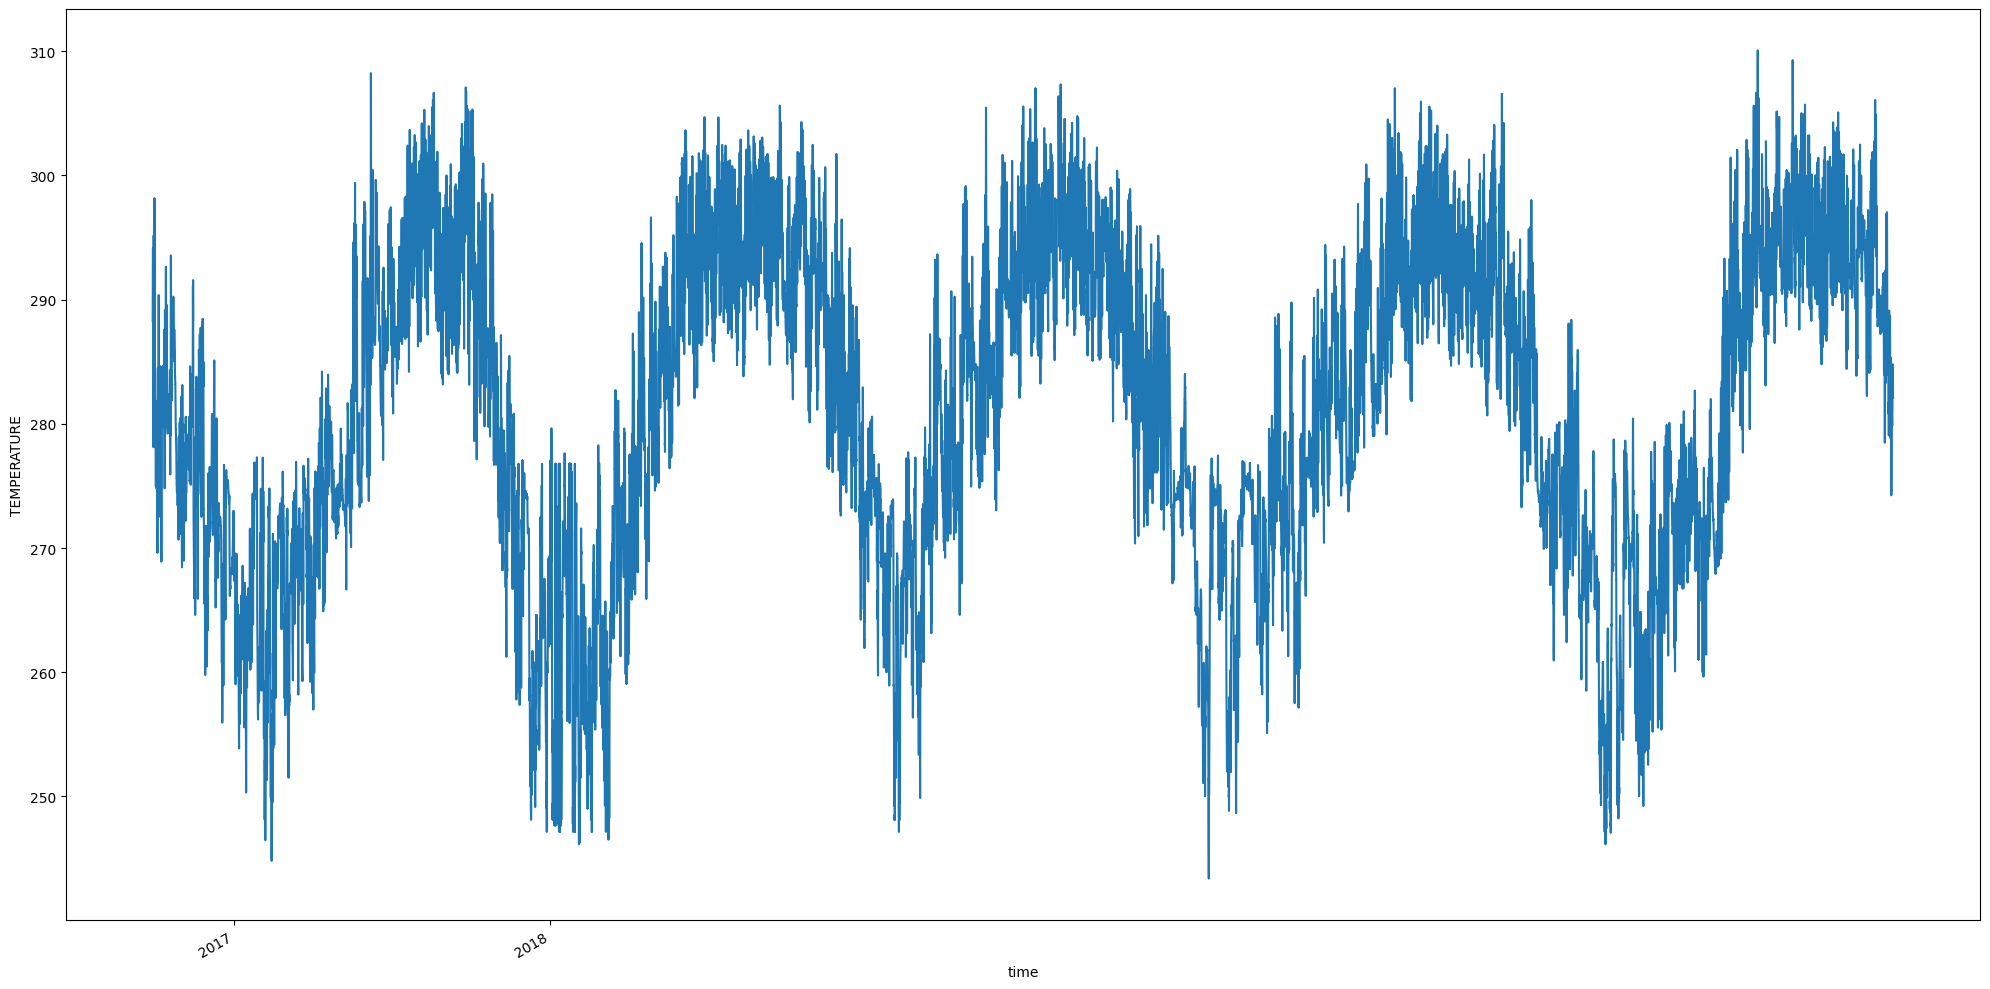

In [40]:
fig ,ax=plt.subplots(figsize=(20,10))
ax.plot(df['temp'])
ax.set_xlabel('time')
ax.set_ylabel('TEMPERATURE')

plt.xticks([2239,10999],[2017,2018])
fig.autofmt_xdate()
plt.tight_layout()

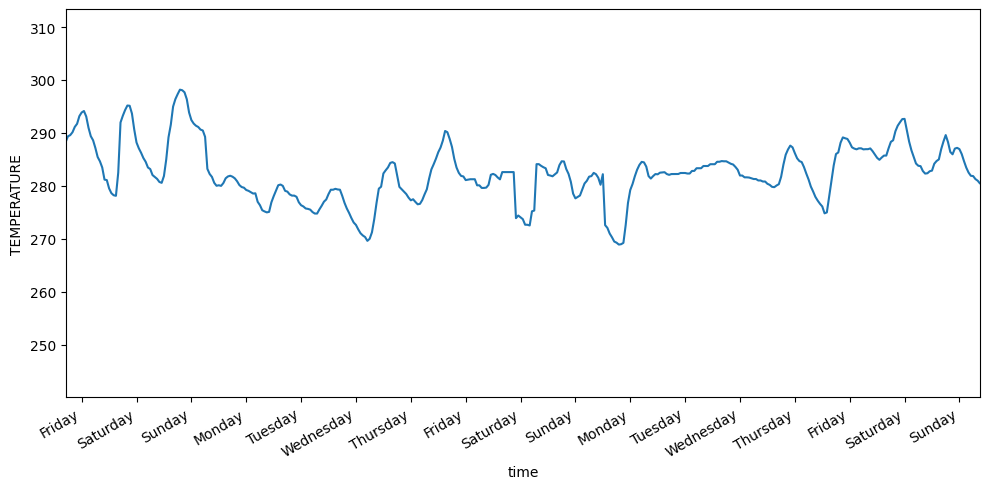

In [41]:
fig ,ax=plt.subplots(figsize=(10,5))
ax.plot(df['temp'])
ax.set_xlabel('time')
ax.set_ylabel('TEMPERATURE')
days = ['Friday','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday']
resized_days = np.resize(days, 17)

plt.xticks(np.arange(7,400,24),resized_days)

plt.xlim(0,400)
fig.autofmt_xdate()
plt.tight_layout()

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.258894,12.713645,243.39,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.00,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.00,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.00,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.00,1193.00,3380.00,4933.000,7280.00


In [43]:
cols_to_drop=['rain_1h','snow_1h']
df_2=df.drop(cols_to_drop,axis=1,inplace=False)
df_2.head()

,holiday,temp,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [47]:
timestamp_s = pd.to_datetime(df['date_time']).map(pd.Timestamp.timestamp)
timestamp_s.head()

0    1.349168e+09
1    1.349172e+09
2    1.349176e+09
3    1.349179e+09
4    1.349183e+09
Name: date_time, dtype: float64

In [48]:
day=24*60*60
df['day_sin']=np.sin(timestamp_s * (2 * np.pi / day)).values

In [50]:
df['day_cos']=np.cos(timestamp_s * (2 * np.pi / day)).values
df=df.drop(['date_time'],axis=1,inplace=False)

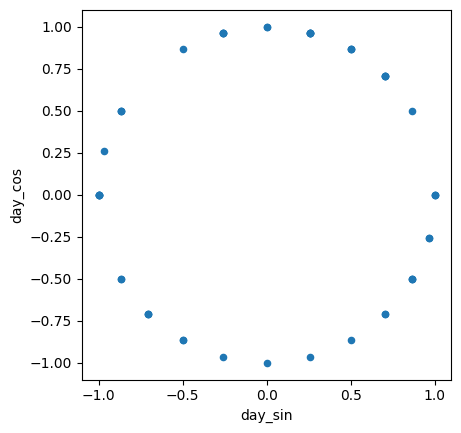

In [51]:
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal') ;

In [54]:
from sklearn.preprocessing import MinMaxScaler
df_encoded = pd.get_dummies(df)
df_encoded.head()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day_sin,day_cos,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,288.28,0.0,0.0,40,5545,7.071068e-01,-0.707107,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,289.36,0.0,0.0,75,4516,5.000000e-01,-0.866025,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,289.58,0.0,0.0,90,4767,2.588190e-01,-0.965926,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,290.13,0.0,0.0,90,5026,1.143105e-11,-1.000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,291.14,0.0,0.0,75,4918,-2.588190e-01,-0.965926,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:

scaler=MinMaxScaler()
scaler.fit(df_encoded)
scaled_data=scaler.transform(df_encoded)
scaled_data

array([[0.67321536, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68941212, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69271146, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.589982  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58038392, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58083383, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [59]:
train_df=scaled_data[:int(0.7*len(scaled_data))]
vali_df=scaled_data[int(0.7*len(scaled_data)):int(0.8*len(scaled_data))]
test_df=scaled_data[int(0.8*len(scaled_data)):]

In [61]:
pd.DataFrame(train_df).to_csv('train.csv',index=False)
pd.DataFrame(vali_df).to_csv('vali.csv',index=False)
pd.DataFrame(test_df).to_csv('test.csv',index=False)